<a href="https://colab.research.google.com/github/ActiveStacks/DatasetThree/blob/main/Final1_EXPERIMENT_CODEBERTLLM_3E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

path = ('/content/drive/MyDrive/Dataset3/LVDAndro_APKs_Combined_Processed.csv')

In [8]:
df = pd.read_csv(path)

<ipython-input-8-7b06c29b8c94>:1: DtypeWarning: Columns (3,4,5,7,8,10,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [9]:

from sklearn.model_selection import train_test_split

In [10]:
df.head()

,Unnamed: 0,level_0,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
0,0,0,0,NaN,NaN,NaN,package org.ksoap2.samples.amazon;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.ksoap2.samples.amazon;,NaN,NaN,NaN
1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,2,2,NaN,NaN,NaN,import allahabadbank.albumbrella.BuildConfig;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import allahabadbank.albumbrella.BuildConfig;,NaN,NaN,NaN
3,3,3,3,NaN,NaN,NaN,import java.util.Vector;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import java.util.Vector;,NaN,NaN,NaN
4,4,4,4,NaN,NaN,NaN,import javax.microedition.lcdui.Command;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import javax.microedition.lcdui.Command;,NaN,NaN,NaN


In [11]:
df.dropna()

,Unnamed: 0,level_0,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity


In [12]:
df.head()

,Unnamed: 0,level_0,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
0,0,0,0,NaN,NaN,NaN,package org.ksoap2.samples.amazon;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.ksoap2.samples.amazon;,NaN,NaN,NaN
1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,2,2,NaN,NaN,NaN,import allahabadbank.albumbrella.BuildConfig;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import allahabadbank.albumbrella.BuildConfig;,NaN,NaN,NaN
3,3,3,3,NaN,NaN,NaN,import java.util.Vector;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import java.util.Vector;,NaN,NaN,NaN
4,4,4,4,NaN,NaN,NaN,import javax.microedition.lcdui.Command;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import javax.microedition.lcdui.Command;,NaN,NaN,NaN


In [13]:
df.tail()

,Unnamed: 0,level_0,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
15470973,15470973,17038753,12927643,NaN,NaN,NaN,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,NaN
15470974,15470974,17038754,12927644,NaN,NaN,NaN,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,NaN
15470975,15470975,17038755,12927645,NaN,NaN,NaN,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,NaN
15470976,15470976,17038756,12927646,NaN,NaN,NaN,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,NaN
15470977,15470977,17038757,12927647,NaN,NaN,NaN,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,NaN


In [14]:
df.shape

(15470978, 20)

In [15]:
df.describe()

,Unnamed: 0,level_0,index,CVSS,Vulnerability_status
count,1.547098e+07,1.547098e+07,1.547098e+07,114261.000000,1.547098e+07
mean,7.735488e+06,8.744782e+06,5.021267e+06,7.061612,1.240704e-02
std,4.466087e+06,4.934032e+06,4.071244e+06,1.255958,1.106937e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.867744e+06,4.749906e+06,1.188538e+06,7.500000,0.000000e+00
50%,7.735488e+06,8.843156e+06,4.183064e+06,7.500000,0.000000e+00
75%,1.160323e+07,1.303295e+07,8.631376e+06,7.500000,0.000000e+00
max,1.547098e+07,1.703876e+07,1.292765e+07,8.800000,1.000000e+00


In [16]:
df.columns

Index(['Unnamed: 0', 'level_0', 'index', 'Description', 'Type', 'Pattern',
       'Code', 'Severity', 'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc',
       'OWASP_Mobile', 'OWSAP_MASVS', 'Reference', 'Vulnerability_status',
       'processed_code', 'category', 'qark_name', 'severity'],
      dtype='object')

In [17]:
df.nunique()

,0
Unnamed: 0,15470978
level_0,15470978
index,11835679
Description,33
Type,4
Pattern,30
Code,15374801
Severity,7
Input Case,2
CVSS,12


In [18]:
df['Vulnerability_status'].unique()

array([0, 1])

In [19]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    15279029
1      191949
Name: count, dtype: int64


In [20]:
df_safe = df[df['Vulnerability_status']==0]

In [21]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [22]:
df_safe.head()

,Unnamed: 0,level_0,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
0,0,0,0,NaN,NaN,NaN,package org.ksoap2.samples.amazon;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.ksoap2.samples.amazon;,NaN,NaN,NaN
1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,2,2,NaN,NaN,NaN,import allahabadbank.albumbrella.BuildConfig;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import allahabadbank.albumbrella.BuildConfig;,NaN,NaN,NaN
3,3,3,3,NaN,NaN,NaN,import java.util.Vector;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import java.util.Vector;,NaN,NaN,NaN
4,4,4,4,NaN,NaN,NaN,import javax.microedition.lcdui.Command;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import javax.microedition.lcdui.Command;,NaN,NaN,NaN


In [23]:
df_safe.tail()

,Unnamed: 0,level_0,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
15470973,15470973,17038753,12927643,NaN,NaN,NaN,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,NaN
15470974,15470974,17038754,12927644,NaN,NaN,NaN,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,NaN
15470975,15470975,17038755,12927645,NaN,NaN,NaN,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,NaN
15470976,15470976,17038756,12927646,NaN,NaN,NaN,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,NaN
15470977,15470977,17038757,12927647,NaN,NaN,NaN,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,NaN


In [24]:
df_vulnerable.head()

,Unnamed: 0,level_0,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
60,60,60,60,The App logs information. Sensitive informatio...,NaN,NaN,System.err.println(ht.responseDump);,info,NaN,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.err.println(ht.responseDump);,NaN,NaN,NaN
108,108,108,108,The App logs information. Sensitive informatio...,NaN,NaN,System.out.println(response.elementAt(i));,info,NaN,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(response.elementAt(i));,NaN,NaN,NaN
129,129,129,129,The App logs information. Sensitive informatio...,NaN,NaN,"System.out.println(""Please substitute your own...",info,NaN,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.println(""user_str"");",NaN,NaN,NaN
142,142,142,142,The App logs information. Sensitive informatio...,NaN,NaN,System.out.println(response);,info,NaN,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(response);,NaN,NaN,NaN
204,204,204,204,The App logs information. Sensitive informatio...,NaN,NaN,"System.out.println(""Request: "" + new String(in...",info,NaN,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.println(""user_str"" + new String(inp...",NaN,NaN,NaN


In [25]:
df_vulnerable.tail()

,Unnamed: 0,level_0,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
15470936,15470936,17038716,12927606,NaN,NaN,NaN,"public native void call(final Pointer p0, @Cas...",NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,"public native void call(final Pointer p0, @Cas...",file,Insecure functions found,WARNING
15470937,15470937,17038717,12927607,NaN,NaN,NaN,public native void call(freenect.freenect_cont...,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public native void call(freenect.freenect_cont...,file,Insecure functions found,WARNING
15470938,15470938,17038718,12927608,NaN,NaN,NaN,public native long call(final AVFormatContext ...,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public native long call(final AVFormatContext ...,file,Insecure functions found,WARNING
15470939,15470939,17038719,12927609,NaN,NaN,NaN,public native int call(avcodec.AVCodecContext ...,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public native int call(avcodec.AVCodecContext ...,file,Insecure functions found,WARNING
15470941,15470941,17038721,12927611,NaN,NaN,NaN,public native int call(@Const final Pointer p0);,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public native int call(@Const final Pointer p0);,file,Insecure functions found,WARNING


In [26]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [27]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [28]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [29]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [30]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
1    191949
0    191949
Name: count, dtype: int64


In [31]:
print(df_balanced.value_counts())

Series([], Name: count, dtype: int64)


<Axes: >

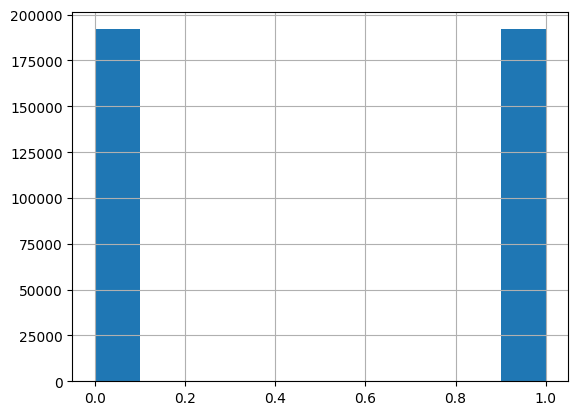

In [32]:
df_balanced['Vulnerability_status'].hist()

In [33]:
df_balanced.head()

,Unnamed: 0,level_0,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
0,4087593,5013005,330538,App uses SQLite Database and execute raw SQL q...,RegexAndOr,"['android\\.database\\.sqlite', ['rawQuery\\('...","return this.db.rawQuery(sb.toString(), null);",warning,exact,5.9,CWE-89,Improper Neutralization of Special Elements us...,M7: Client Code Quality,NaN,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"return this.db.rawQuery(sb.toString(), null);",NaN,NaN,NaN
1,9570030,10834695,6241840,NaN,NaN,NaN,WorkSpecDao_Impl.this.__fetchRelationshipWorkP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,WorkSpecDao_Impl.this.__fetchRelationshipWorkP...,NaN,NaN,NaN
2,3305023,3950574,781048,NaN,NaN,NaN,((Spinner) findViewById(id)).setSelection(iSel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,((Spinner) findViewById(id)).setSelection(iSel...,NaN,NaN,NaN
3,5188252,6202322,1525099,NaN,NaN,NaN,String str4 = fVar4.f2586a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,String str4 = fVar4.f2586a;,NaN,NaN,NaN
4,2141745,2141745,2248046,NaN,NaN,NaN,this.controlsLayout.addView((View)this.mRewind);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.controlsLayout.addView((View)this.mRewind);,NaN,NaN,NaN


In [34]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [35]:
df_balanced.head(10)

,Unnamed: 0,level_0,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
0,4087593,5013005,330538,RegexAndOr,"['android\\.database\\.sqlite', ['rawQuery\\('...",exact,5.9,M7: Client Code Quality,NaN,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"return this.db.rawQuery(sb.toString(), null);",NaN,NaN,NaN
1,9570030,10834695,6241840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,WorkSpecDao_Impl.this.__fetchRelationshipWorkP...,NaN,NaN,NaN
2,3305023,3950574,781048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,((Spinner) findViewById(id)).setSelection(iSel...,NaN,NaN,NaN
3,5188252,6202322,1525099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,String str4 = fVar4.f2586a;,NaN,NaN,NaN
4,2141745,2141745,2248046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.controlsLayout.addView((View)this.mRewind);,NaN,NaN,NaN
5,5145183,6158367,1480891,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"public static final String ACCOUNT_KEY = ""user...",NaN,NaN,NaN
6,789194,789194,810235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.e(""user_str"", group);",file,Logging found,NaN
7,6133111,7190400,2518775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (bindResponseProtocolOp.getResultCode() == ...,NaN,NaN,NaN
8,10216459,11551953,7024497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,SEARCH_TEXT = var1;,NaN,NaN,NaN
9,8413104,9536498,4883482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.f823b.s = (int) Math.ceil((double) (I * 0...,NaN,NaN,NaN


In [36]:
df_balanced.tail(10)

,Unnamed: 0,level_0,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity
383888,1182051,1182051,1225800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.e(s, string);",file,Logging found,NaN
383889,1795053,1795053,1878561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,class_503 var5 = new class_503();,NaN,NaN,NaN
383890,12257696,13719658,9363144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,r$m var44 = (r$m)this.field_1774.get(var5);,NaN,NaN,NaN
383891,4739850,5728896,1049439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public static final String PREFERENCES_KEY_REC...,NaN,NaN,NaN
383892,6526906,7597851,2929383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (!(obj instanceof Record)) {,NaN,NaN,NaN
383893,269615,269615,269615,NaN,NaN,NaN,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(StartAppSDKWrapper.WRAPPER_NAME, Message);",NaN,NaN,NaN
383894,4970736,5972773,1294090,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"NLog.e(""user_str"", ""user_str"", e);",NaN,NaN,NaN
383895,8950252,10084643,5436750,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.wtf(MediaPlayerPresenter.TAG, ""user_str"");",NaN,NaN,NaN
383896,13813177,15331773,11096419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"of = Cell.of(n6, n8);",NaN,NaN,NaN
383897,7277285,8361990,3696954,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return android.util.Log.isLoggable(PlatformUti...,NaN,NaN,NaN


In [37]:
df_balanced.dropna()

,Unnamed: 0,level_0,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,qark_name,severity


In [38]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [39]:
df_balanced.head()

,processed_code,Vulnerability_status
0,"return this.db.rawQuery(sb.toString(), null);",1
1,WorkSpecDao_Impl.this.__fetchRelationshipWorkP...,0
2,((Spinner) findViewById(id)).setSelection(iSel...,0
3,String str4 = fVar4.f2586a;,0
4,this.controlsLayout.addView((View)this.mRewind);,0


In [40]:
df_balanced.columns = ['text', 'labels']

In [41]:
df_balanced.head(5)

,text,labels
0,"return this.db.rawQuery(sb.toString(), null);",1
1,WorkSpecDao_Impl.this.__fetchRelationshipWorkP...,0
2,((Spinner) findViewById(id)).setSelection(iSel...,0
3,String str4 = fVar4.f2586a;,0
4,this.controlsLayout.addView((View)this.mRewind);,0


In [42]:
df_balanced.head(5)

,text,labels
0,"return this.db.rawQuery(sb.toString(), null);",1
1,WorkSpecDao_Impl.this.__fetchRelationshipWorkP...,0
2,((Spinner) findViewById(id)).setSelection(iSel...,0
3,String str4 = fVar4.f2586a;,0
4,this.controlsLayout.addView((View)this.mRewind);,0


In [43]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [44]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [45]:
from datasets import load_dataset, DatasetDict

In [46]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [47]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 383898
    })
})

In [48]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [49]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [50]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 230338
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 76780
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 76780
    })
})

In [51]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [52]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [53]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [54]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/230338 [00:00<?, ? examples/s]

Map:   0%|          | 0/76780 [00:00<?, ? examples/s]

Map:   0%|          | 0/76780 [00:00<?, ? examples/s]

In [55]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [56]:
!pip install torchinfo

In [57]:
from torchinfo import summary

In [58]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [59]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [60]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [61]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.4 MB/s eta 0:00:00


In [62]:
import evaluate

In [63]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [64]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-64-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [65]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.148100,0.140766,{'accuracy': 0.9583876009377442},{'recall': 0.9581789443681497},{'precision': 0.9589989626556017},{'f1': 0.9585887781421332}
2,0.696300,0.693020,{'accuracy': 0.49735608231310235},{'recall': 0.0},{'precision': 0.0},{'f1': 0.0}
3,0.141200,0.128978,{'accuracy': 0.9647173743162282},{'recall': 0.952685720208328},{'precision': 0.976547144754316},{'f1': 0.9644688692732447}
4,0.118400,0.118133,{'accuracy': 0.9679994790309977},{'recall': 0.9616769880548286},{'precision': 0.9743253176520004},{'f1': 0.967959835691465}


Trainer is attempting to log a value of "{'accuracy': 0.9583876009377442}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9581789443681497}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9589989626556017}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9585887781421332}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: Undefined

TrainOutput(global_step=57588, training_loss=0.2553200985546235, metrics={'train_runtime': 20837.0447, 'train_samples_per_second': 44.217, 'train_steps_per_second': 2.764, 'total_flos': 2.4241789707804672e+17, 'train_loss': 0.2553200985546235, 'epoch': 4.0})

In [66]:
outcome= trainer.predict(tokenized_datasets['test'])

In [67]:
print(outcome.metrics)

{'test_loss': 0.12445732951164246, 'test_accuracy': {'accuracy': 0.9663974993487887}, 'test_recall': {'recall': 0.960091874820557}, 'test_precision': {'precision': 0.9722214880401744}, 'test_f1': {'f1': 0.9661186111257026}, 'test_runtime': 479.8219, 'test_samples_per_second': 160.018, 'test_steps_per_second': 2.501}
